In [107]:
# Imports
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
# Read in clean data
rock_clean = pd.read_csv('./Data/rock_clean.csv')
rap_clean = pd.read_csv('./Data/rap_clean.csv')

# Read in original data
#rock = pd.read_csv('./Data/rock.csv')
#rap = pd.read_csv('./Data/rap.csv')

In [109]:
# Get shapes of original and cleaned data
print(rock_clean.shape)
#print(rock.shape)

(959, 4)


In [110]:
# Get the shape of both original and cleaned data
print(rap_clean.shape)
#print(rap.shape)

(999, 4)


In [111]:
# Drop null values from the rock dataset
rock_clean['title'].dropna(inplace=True)

In [112]:
# Get null value counts
rock_clean['title'].isnull().sum()

0

In [113]:
# Drop null values from the rap dataset
rap_clean['title'].dropna(inplace=True)

In [114]:
# Get null value counts
rap_clean['title'].isnull().sum()

0

In [115]:
rap_clean

,title,comments,age,thread
0,eminem one breath,45,844.253953,rap
1,trrewillz got nothin inland empire rap new rap...,1,161.570620,rap
2,need rapper raw beat made open suggestions,1,163.520620,rap
3,rap bangers,6,168.570620,rap
4,one favorite verses j cole verse end logic afr...,0,153.387287,rap
...,...,...,...,...
994,gretzky big bity bank freestyle rap,0,22525.487287,rap
995,pac eminem die soon,0,22659.670620,rap
996,blackbear x bryson tiller x juice wrld type be...,3,22917.453953,rap
997,pac overrated,27,22765.820620,rap


In [116]:
# Define function to find and visualize the most common words within thread titles
def plot_common_words(column):
    
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(column)
    df_words = pd.DataFrame(words.toarray(), columns=cv.get_feature_names())
    df_common = pd.DataFrame(df_words.sum().sort_values(ascending=False).head(10))
    df_common.rename(columns={0: 'Count'}, inplace=True)
    
    ax = sns.barplot(df_common.index, df_common['Count']);
    ax.set(xlabel='Word', ylabel='Word Count')

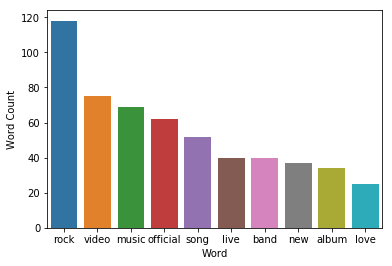

In [117]:
# Visualize the most common unique words in rock
plot_common_words(rock_clean['title'])

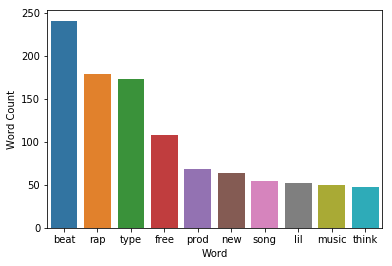

In [118]:
# Visualize the most common unique words in rap
plot_common_words(rap_clean['title'])

In [119]:
# Concatenate the two dataframes prior to model development
df = pd.concat([rock_clean, rap_clean], axis=0)

In [120]:
# Reassign rock to 1 and rap to 0 prior to binary classification
df['thread'] = df['thread'].map(lambda x: 1 if x == 'rock' else 0)

The data contained in the DataFrame below is going to be used to train a model in order to classify subreddit posts by name. This is a binary classification problem so I used 1 to represent rock and 0 to represent rap.

In [121]:
df.head()

,title,comments,age,thread
0,october recommendations suggestions playlists ...,20,20551.811835,1
1,october covers thread,3,20550.578502,1
2,rock hall fame notorious b g whitney houston s...,9,580.078502,1
3,pat benatar invincible,0,106.795169,1
4,kate bush david gilmour running hill live secr...,0,544.745169,1


In [122]:
df.shape

(1958, 4)

The code below was only ran once; the file train.csv contains the original data used for model development.

In [123]:
# Create .csv file containing training data for the model
df.to_csv('./Data/train.csv', index=False)